In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nice
plt.style.use('ggplot')
sns.set_palette("pastel")

In [5]:
# Load datasets
cab_data = pd.read_csv("Cab_Data.csv")
customer_data = pd.read_csv("Customer_ID.csv")
transaction_data = pd.read_csv("Transaction_ID.csv")
city_data = pd.read_csv("City.csv")


In [7]:
# Data info and missing values check
for df, name in zip([cab_data, customer_data, transaction_data, city_data],
                    ["Cab Data", "Customer Data", "Transaction Data", "City Data"]):
    print(f"🔍 {name} Info:")
    print(df.info(), "\n")
    print("Missing Values:\n", df.isnull().sum(), "\n")


🔍 Cab Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None 

Missing Values:
 Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64 

🔍 Customer Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------

In [9]:
# Remove duplicates
cab_data.drop_duplicates(inplace=True)
customer_data.drop_duplicates(inplace=True)
transaction_data.drop_duplicates(inplace=True)
city_data.drop_duplicates(inplace=True)

# Remove missing values
cab_data.dropna(inplace=True)
customer_data.dropna(inplace=True)
transaction_data.dropna(inplace=True)
city_data.dropna(inplace=True)

print("✅ Data cleaned successfully!")


✅ Data cleaned successfully!


In [11]:
# Merge Cab Data with Transaction Data (Transaction_ID is the key)
merged_df = pd.merge(cab_data, transaction_data, on="Transaction ID", how="left")

# Merge with Customer Data (Customer_ID is the key)
merged_df = pd.merge(merged_df, customer_data, on="Customer ID", how="left")

# Merge with City Data (City is the key)
merged_df = pd.merge(merged_df, city_data, on="City", how="left")

print("✅ Data Merging Complete!")
merged_df.head()


✅ Data Merging Complete!


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


In [13]:
# Calculate profit
merged_df["Profit"] = merged_df["Price Charged"] - merged_df["Cost of Trip"]

# Price per KM
merged_df["Price per KM"] = merged_df["Price Charged"] / merged_df["KM Travelled"]

# Profit per KM
merged_df["Profit per KM"] = merged_df["Profit"] / merged_df["KM Travelled"]

# Number of rides per customer
customer_rides = merged_df.groupby("Customer ID")["Transaction ID"].count().reset_index()
customer_rides.rename(columns={"Transaction ID": "Number of Rides"}, inplace=True)

# Merge back into main dataset
merged_df = pd.merge(merged_df, customer_rides, on="Customer ID", how="left")

print("✅ Feature Engineering Complete!")
merged_df.head()


✅ Feature Engineering Complete!


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Price per KM,Profit per KM,Number of Rides_x,Number of Rides_y
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",57.315,12.182266,1.882266,3,3
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",23.666,12.526904,0.826904,4,4
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",27.568,13.849558,3.049558,4,4
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",25.798,11.377751,0.777751,4,4
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701",16.844,13.129439,1.929439,4,4


In [17]:
# Convert "Date of Travel" to datetime format correctly
merged_df["Date of Travel"] = pd.to_datetime(merged_df["Date of Travel"], errors="coerce")

# Extract Month and Year
merged_df["Month"] = merged_df["Date of Travel"].dt.month
merged_df["Year"] = merged_df["Date of Travel"].dt.year

print("✅ Date conversion successful!")
print(merged_df[["Date of Travel", "Month", "Year"]].head())  # Verify results


✅ Date conversion successful!
                 Date of Travel  Month  Year
0 1970-01-01 00:00:00.000042377      1  1970
1 1970-01-01 00:00:00.000042375      1  1970
2 1970-01-01 00:00:00.000042371      1  1970
3 1970-01-01 00:00:00.000042376      1  1970
4 1970-01-01 00:00:00.000042372      1  1970


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


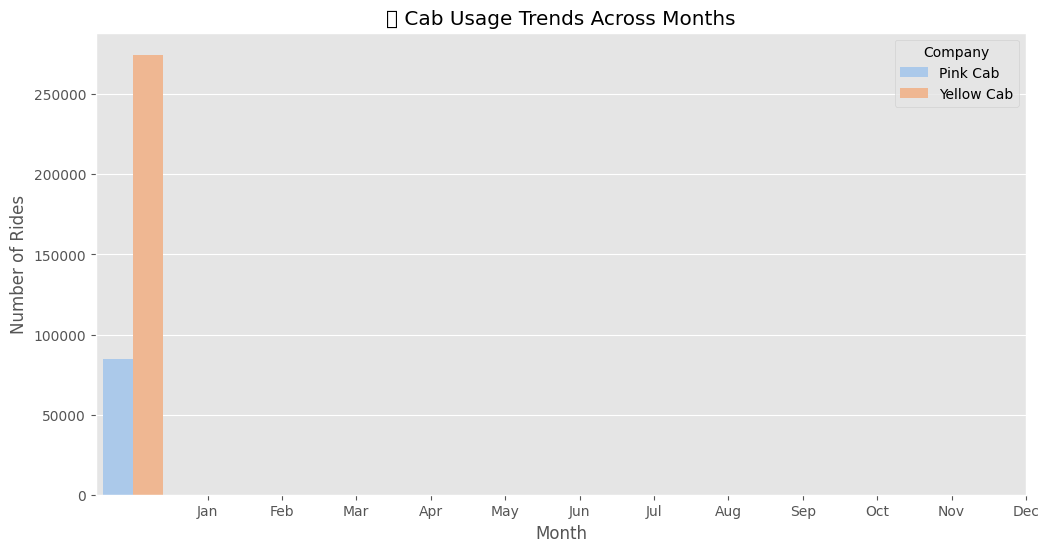

In [19]:
plt.figure(figsize=(12, 6))

# Plot cab usage trends by month
sns.countplot(data=merged_df, x="Month", hue="Company")

plt.title("📊 Cab Usage Trends Across Months")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                           "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])  # Convert numbers to month names
plt.legend(title="Company")

plt.show()


<ipython-input-21-2041618e06c4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_users, x="Company", y="Customer ID", palette=["#3498db", "#e74c3c"])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


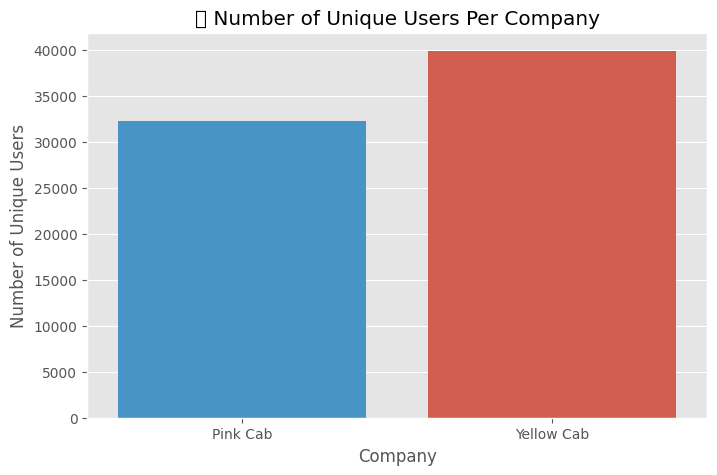

In [21]:
company_users = merged_df.groupby("Company")["Customer ID"].nunique().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=company_users, x="Company", y="Customer ID", palette=["#3498db", "#e74c3c"])

plt.title("🏆 Number of Unique Users Per Company")
plt.ylabel("Number of Unique Users")
plt.xlabel("Company")

plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


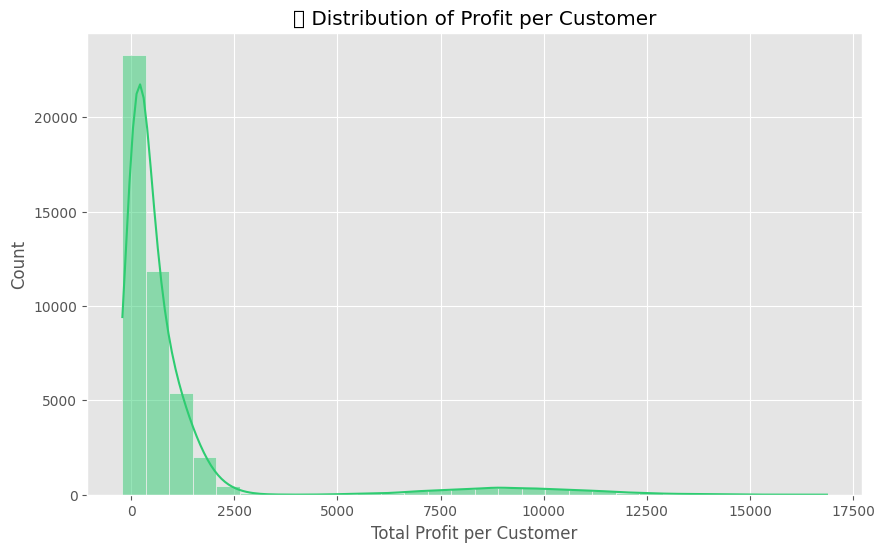

In [23]:
profit_per_customer = merged_df.groupby("Customer ID")["Profit"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(profit_per_customer["Profit"], bins=30, kde=True, color="#2ecc71")

plt.title("💰 Distribution of Profit per Customer")
plt.xlabel("Total Profit per Customer")
plt.ylabel("Count")

plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


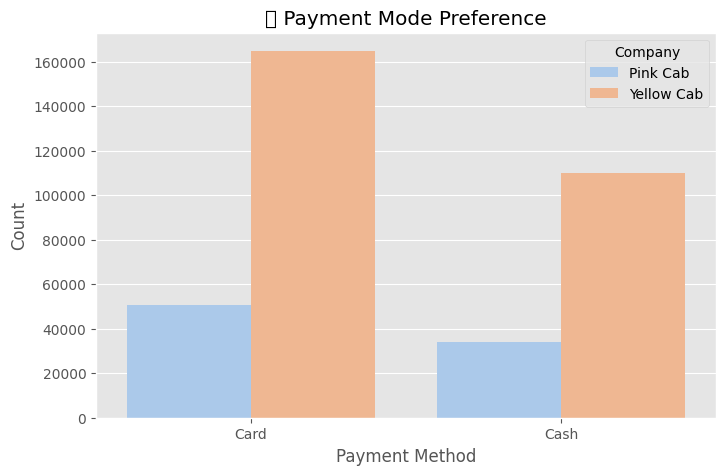

In [28]:
plt.figure(figsize=(8, 5))

sns.countplot(data=merged_df, x="payment_mode", hue="company", palette="pastel")

plt.title("💳 Payment Mode Preference")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.legend(title="Company")

plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


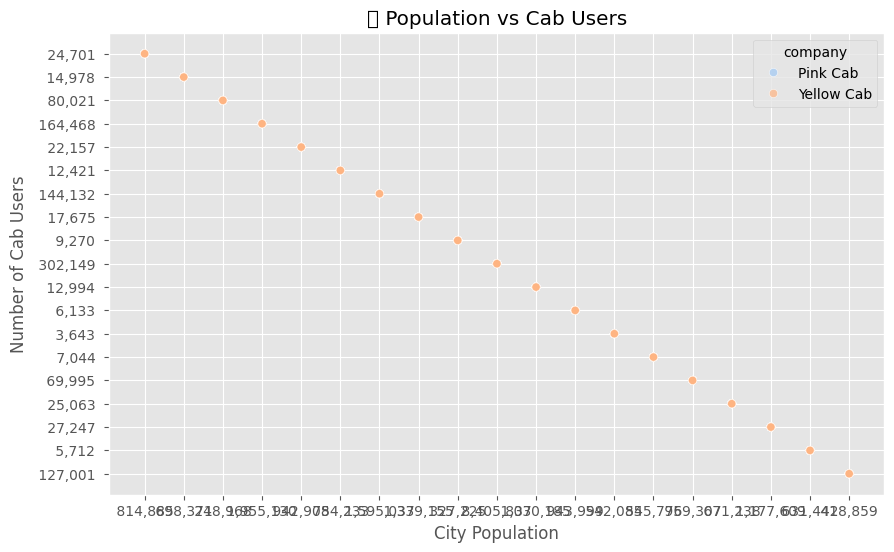

In [32]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=merged_df, x="population", y="users", hue="company", alpha=0.7)

plt.title("🏙️ Population vs Cab Users")
plt.xlabel("City Population")
plt.ylabel("Number of Cab Users")

plt.show()